<a href="https://colab.research.google.com/github/Pawanme9034/Gradient-Descent/blob/main/Copy_of_Copy_of_Self_Project_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent for Optimization

In [ ]:
# Matrix computations
from numpy import *

# Plotting
from matplotlib.pyplot import *

# Change size of figures
fig_size = [9,7]
rcParams["figure.figsize"] = fig_size

## Minimizing multiple variable function

Let us consider the following straight forward bivariate function $$f(x,y) = x^2 + y^2 + 1.$$ Since this a function of two variables, we have have the following partial derivatives $$\frac{df(x)}{dx} = f_{x} = 2x \text{ and } \frac{df(y)}{dy} = f_{y} = 2y.$$ Note that its easy to argue that the global minimum of $f(x,y)$ is (0,0) since $f(0,0) = 1$ and $f(x,y) \ge 1.$


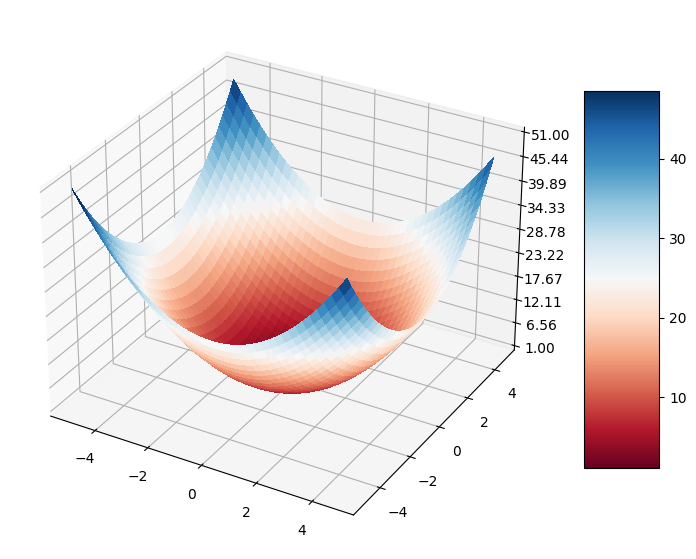

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x, y)
def f(x, y):
    return x**2 + y**2 + 1

# Generate x and y values
x = np.arange(-5, 5, 0.25)
y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(x, y)

# Compute the function values for each point in the grid
Z = f(X, Y)

# Create a 3D plot
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.RdBu, linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.7, aspect=5)

plt.show()


### Finding global minimum using gradient descent

For this example the gradient descent algorithm is simplified to

$$
\begin{bmatrix}
    x^{t+1} \\ 
    y^{t+1}
\end{bmatrix}
=
\begin{bmatrix}
    x^{t} \\ 
    y^{t}
\end{bmatrix}
-
\lambda
\begin{bmatrix}
    2x^{t} \\ 
    2y^{t} \\ 
\end{bmatrix},
$$

where $t$ is the gradient descent iteration. 

In [ ]:
# Your code here
import numpy as np

# Define the function to minimize
def function_to_minimize(x, y):
    return x**2 + y**2

# Gradient of the function with respect to x and y
def gradient(x, y):
    grad_x = 2 * x
    grad_y = 2 * y
    return grad_x, grad_y

# Gradient Descent function
def gradient_descent(initial_point, learning_rate, num_iterations):
    x = initial_point[0]
    y = initial_point[1]
    for i in range(num_iterations):
        grad_x, grad_y = gradient(x, y)
        x -= learning_rate * grad_x
        y -= learning_rate * grad_y
    return x, y

# Initial point
initial_point = np.array([0, 0])

# Learning rate
learning_rate = 0.1

# Number of iterations
num_iterations = 100

# Call the gradient descent function
result = gradient_descent(initial_point, learning_rate, num_iterations)

# Print the result
print("Global minimum: x = {:.4f}, y = {:.4f}".format(result[0], result[1]))








Global minimum: x = 0.0000, y = 0.0000


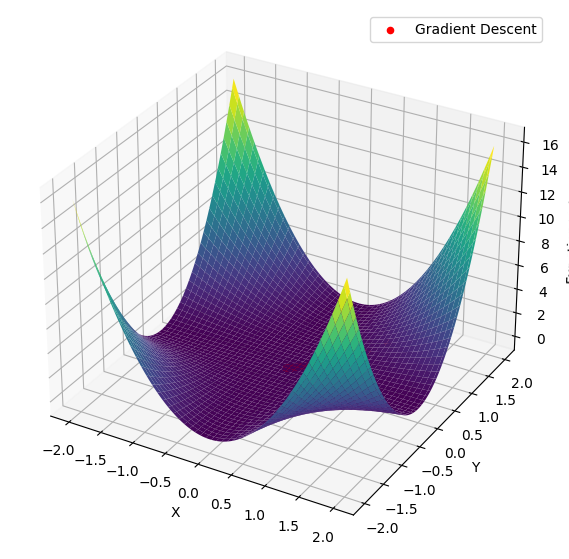

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to be optimized
def func(x, y):
    return x**2 * y**2

# Gradient Descent Algorithm
def gradient_descent(x_init, y_init, learning_rate, num_iterations):
    x = x_init
    y = y_init
    x_history = []
    y_history = []

    for i in range(num_iterations):
        x_history.append(x)
        y_history.append(y)
        gradient_x = 2 * x
        gradient_y = 2 * y
        x -= learning_rate * gradient_x
        y -= learning_rate * gradient_y

    return x_history, y_history

# Initial values
x_init = 1.0
y_init = 1.0

# Learning rate and number of iterations
learning_rate = 0.1
num_iterations = 100

# Run Gradient Descent
x_history, y_history = gradient_descent(x_init, y_init, learning_rate, num_iterations)

# Plot the function
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = func(X, Y)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.scatter(x_history, y_history, func(np.array(x_history), np.array(y_history)), color='r', marker='o', label='Gradient Descent')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Function Value')
ax.legend()
plt.show()
